In [1]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.18.1'

In [2]:
%matplotlib inline

http://hbd.org/brewery/library/HydromCorr0992.html

Hydrometer Temperature Corrections

Posted to HBD #963, 9/7/92, by Christopher Lyons Following up on the specific
gravity of water as a function of temperature.... The earlier equation was
based on data for 50F-to-105F. Since the equation was from a polynomial fit,
it should not be trusted for predicting SG outside this temperature range.
The data below was obtained using the "Handbook of Chemistry and Physics (CRC)"
and is valid for a temperature range between 0 and 212F.
    
        Temp (C)  Temp (F)  Density  Correction relative to 59F
        -------   --------  -------  --------------------------
        0          32      0.99987      -0.74
        3.98       39.16   1.00000      -0.87
        5          41      0.99999      -0.86
        10         50      0.99973      -0.6
        15         59      0.99913      0
        18         64.4    0.99862      0.51
        20         68      0.99823      0.9
        25         77      0.99707      2.06
        30         86      0.99567      3.46
        35         95      0.99406      5.07
        38         100.4   0.99299      6.14
        40         104     0.99224      6.89
        45         113     0.99025      8.88
        50         122     0.98807      11.06
        55         131     0.98573      13.4
        60         140     0.98324      15.89
        65         149     0.98059      18.54
        70         158     0.97781      21.32
        75         167     0.97489      24.24
        80         176     0.97183      27.3
        85         185     0.96865      30.48
        90         194     0.96534      33.79
        95         203     0.96192      37.21
        100        212     0.95838      40.75

The correction term was computed relative to 15C (59F). It may be easily
calculated relative to any temperature. A third order polynomial fit to
this data was also very good (R**2 = 0.999969):

        Correction(@59F) =
           1.313454 - 0.132674*T + 2.057793e-3*T**2 - 2.627634e-6*T**3

                where T is in degrees F.

This equation should be good for the entire temperature range of interest

In [56]:
# Original Coefficients
orig = [ -2.627634e-6, 2.057793e-3, -0.132674, 1.313454]

In [45]:
data=pd.read_csv("temp_density.csv", header=None)
data.head()

,0,1,2,3
0,0.00,32.00,0.99987,-0.74
1,3.98,39.16,1.00000,-0.87
2,5.00,41.00,0.99999,-0.86
3,10.00,50.00,0.99973,-0.60
4,15.00,59.00,0.99913,0.00


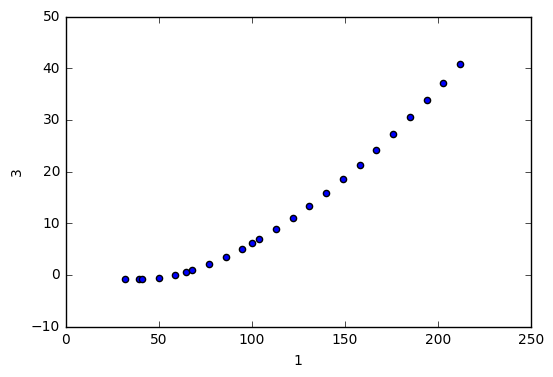

In [46]:
df = pd.DataFrame(data)
df.plot.scatter(x=1, y=3)

In [47]:
def get_equation(xdata, ydata, order=3):
    qout = np.polyfit(xdata, ydata, order)
    print(np.poly1d(qout))
    return qout

In [48]:
def graph(xdata, xlim, ydata, ylim, qout):
    xp = np.linspace(*xlim, num=1500)
    fn = np.poly1d(qout)
    pxp = fn(xp)

    plt.plot(xdata, ydata, '.', xp, pxp, '-')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel('x')
    plt.ylabel('y', rotation='horizontal')
    plt.grid(True)
    plt.show()

In [52]:
xdata = df[1] - CENTER
ydata = df[3]

qout = get_equation(xdata, ydata, 3)

            3            2
-2.628e-06 x + 0.002058 x - 0.1327 x + 1.314


In [72]:
print("Polynomial Fit Coefficients")
print("Calculated vs Original")
print("C4 = {: 0.6e} vs {: 0.6e}".format(qout[0], orig[0]))
print("C3 = {: 0.6e} vs {: 0.6e}".format(qout[1], orig[1]))
print("C2 = {: 0.6f}     vs {: 0.6f}".format(qout[2], orig[2]))
print("C1 = {: 0.6f}     vs {: 0.6f}".format(qout[3], orig[3]))

Polynomial Fit Coefficients
Calculated vs Original
C4 = -2.627657e-06 vs -2.627634e-06
C3 =  2.057802e-03 vs  2.057793e-03
C2 = -0.132676     vs -0.132674
C1 =  1.313507     vs  1.313454


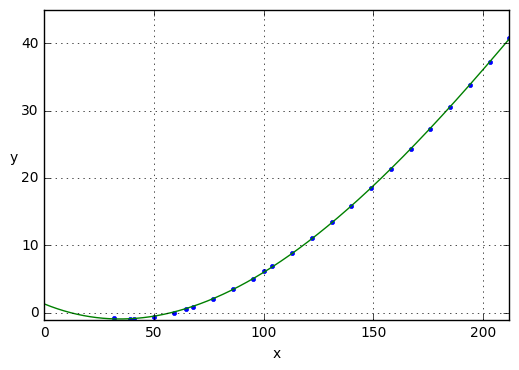

In [69]:
graph(xdata, [0, 212], ydata, [-1.0, 45], qout)

In [70]:
fn = np.poly1d(qout)
print("Data Fit to Polynomial")
print(fn(xdata))

Data Fit to Polynomial
[ -0.91102999  -0.88421961  -0.84813311  -0.50423099   0.10918302
   0.6018159    0.98061555   2.09857322   3.45156267   5.02809051
   6.07652441   6.81666339   8.80578793  10.98397075  13.3397185
  15.86153779  18.53793526  21.35741753  24.30849124  27.37966301
  30.55943947  33.83632725  37.19883299  40.6354633 ]


In [71]:
print("Difference between Polynomial and Original")
print(fn(xdata) - df[3])

Difference between Polynomial and Original
0    -0.171030
1    -0.014220
2     0.011867
3     0.095769
4     0.109183
5     0.091816
6     0.080616
7     0.038573
8    -0.008437
9    -0.041909
10   -0.063476
11   -0.073337
12   -0.074212
13   -0.076029
14   -0.060282
15   -0.028462
16   -0.002065
17    0.037418
18    0.068491
19    0.079663
20    0.079439
21    0.046327
22   -0.011167
23   -0.114537
Name: 3, dtype: float64
